In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from absl import logging
logging.set_verbosity(logging.ERROR)

In [2]:

dataset_url = 'https://www.cryptodatadownload.com/cdd/Gemini_BTCEUR_d.csv'
destination_file = 'Gemini_BTCEUR_d.csv'

response = requests.get(dataset_url)

if response.status_code == 200:
    with open(destination_file, 'wb') as file:
        file.write(response.content)
    print(f'Dataset downloaded successfully to {destination_file}')
else:
    print(f'Failed to download dataset. Status code: {response.status_code}')
    
csv_file_path = 'Gemini_BTCEUR_d.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, skiprows=[0])
# Display the DataFrame


Dataset downloaded successfully to Gemini_BTCEUR_d.csv


In [3]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume EUR
0,1714780800000,2024-05-04 00:00:00,BTC/EUR,58550.01,59779.71,58483.62,59280.12,0.234535,13903.256423
1,1714694400000,2024-05-03 00:00:00,BTC/EUR,55202.52,59309.74,55116.10,58550.01,2.677121,156745.442000
2,1714608000000,2024-05-02 00:00:00,BTC/EUR,53655.68,55563.72,53569.97,55202.52,0.574484,31712.979956
3,1714521600000,2024-05-01 00:00:00,BTC/EUR,56390.86,57248.39,53157.30,53655.68,4.231182,227026.944731
4,1714435200000,2024-04-30 00:00:00,BTC/EUR,59719.37,59719.37,55500.00,56390.86,1.274757,71884.641265
...,...,...,...,...,...,...,...,...,...
1638,1603857600000,2020-10-28 04:00:00,BTC/EUR,0.00,11441.37,0.00,11153.76,0.471273,5256.460917
1639,1603771200000,2020-10-27 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1640,1603684800000,2020-10-26 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000
1641,1603598400000,2020-10-25 04:00:00,BTC/EUR,0.00,0.00,0.00,0.00,0.000000,0.000000


In [4]:
columns_to_drop = ['symbol','unix', 'Volume EUR', 'Volume BTC', 'high', 'open', 'low']
df = df[df['close'] != 0]

df.drop(columns=columns_to_drop, inplace=True)
df

/tmp/ipykernel_45701/3768464653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


,date,close
0,2024-05-04 00:00:00,59280.12
1,2024-05-03 00:00:00,58550.01
2,2024-05-02 00:00:00,55202.52
3,2024-05-01 00:00:00,53655.68
4,2024-04-30 00:00:00,56390.86
...,...,...
1634,2020-11-01 04:00:00,11794.98
1635,2020-10-31 04:00:00,11902.44
1636,2020-10-30 04:00:00,11602.24
1637,2020-10-29 04:00:00,11605.42


/tmp/ipykernel_45701/3707028640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


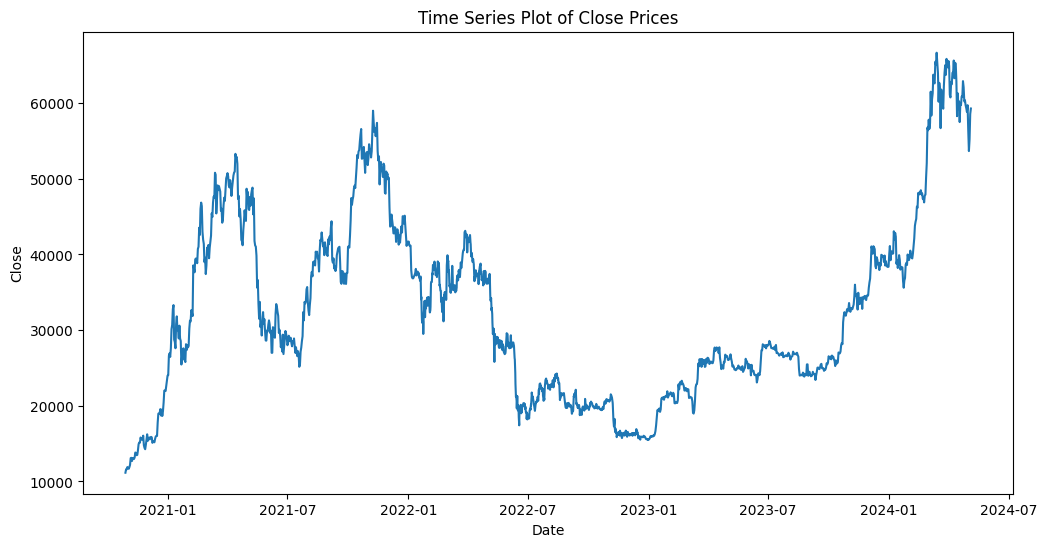

In [5]:
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

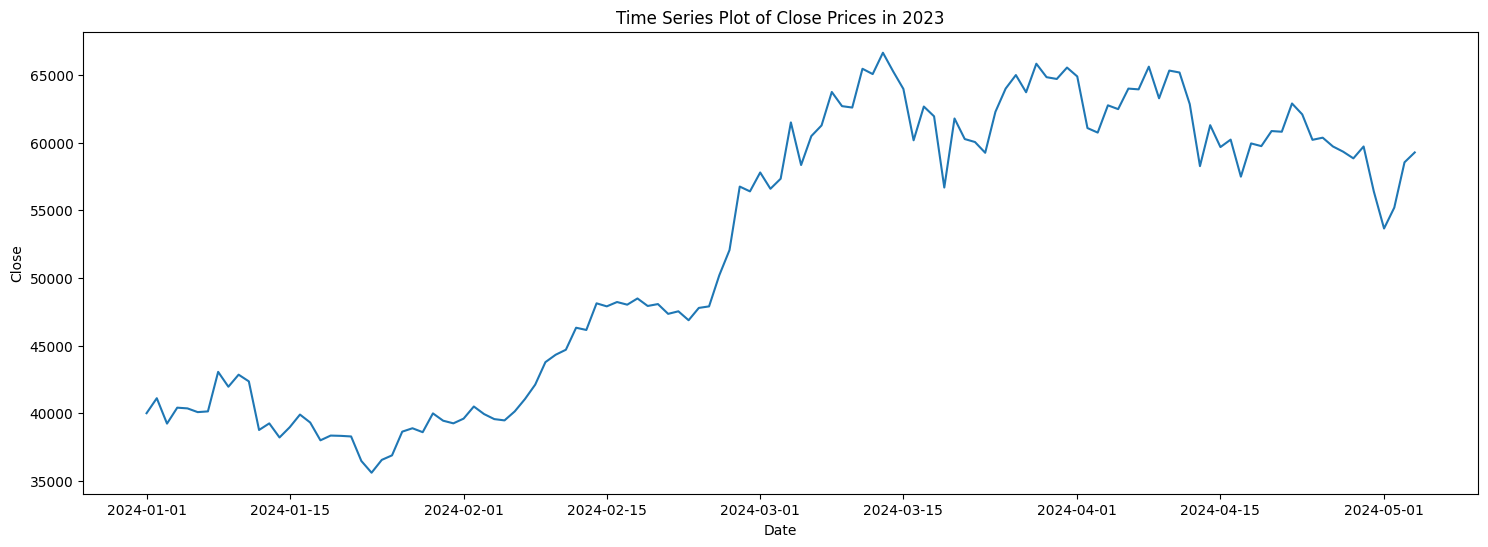

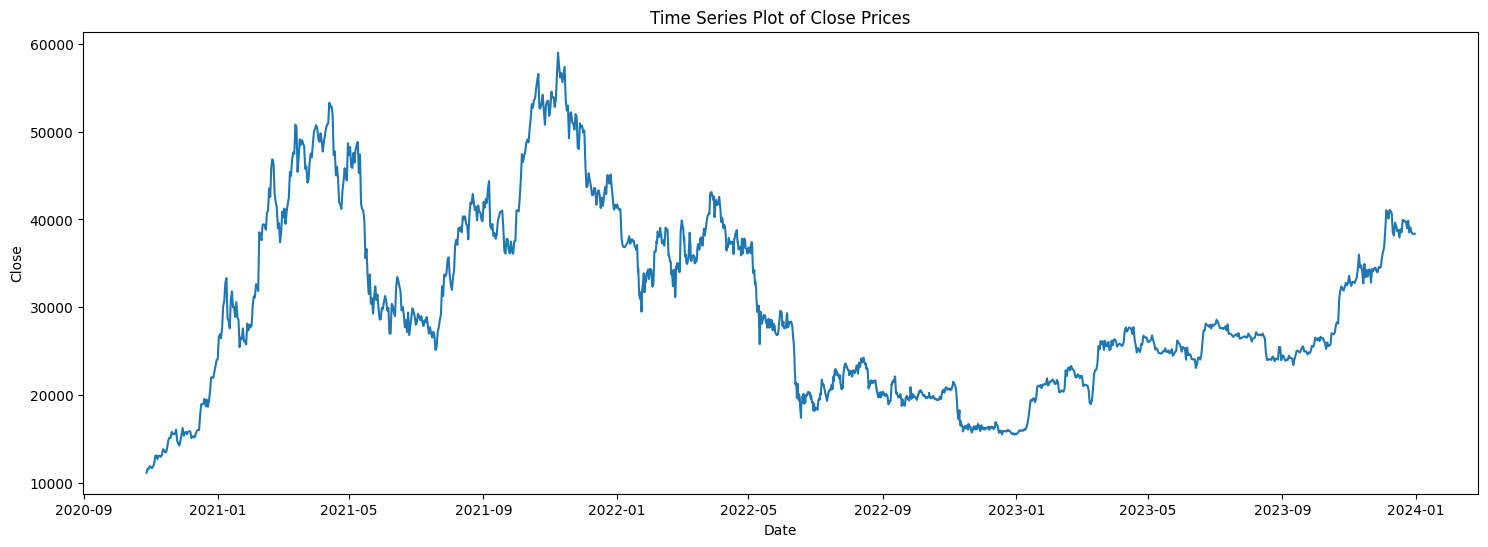

In [6]:
test_set = df[df['date'].dt.year == 2024]

# Training set
train_set = df[df['date'].dt.year != 2024]
# Plotting
plt.figure(figsize=(18, 6))
plt.plot(test_set['date'], test_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices in 2023')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(train_set['date'], train_set['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series Plot of Close Prices')
plt.show()

In [7]:
valid = np.array(test_set['close'])
train = np.array(train_set['close'])

valid = valid[::-1]
train = train[::-1]

In [8]:
def plot_time_series(data):
    indices = np.arange(len(data))
    
    plt.figure(figsize=(10, 6))
    plt.plot(indices, data, label='Time Series Data')
    plt.title('Time Series Plot')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


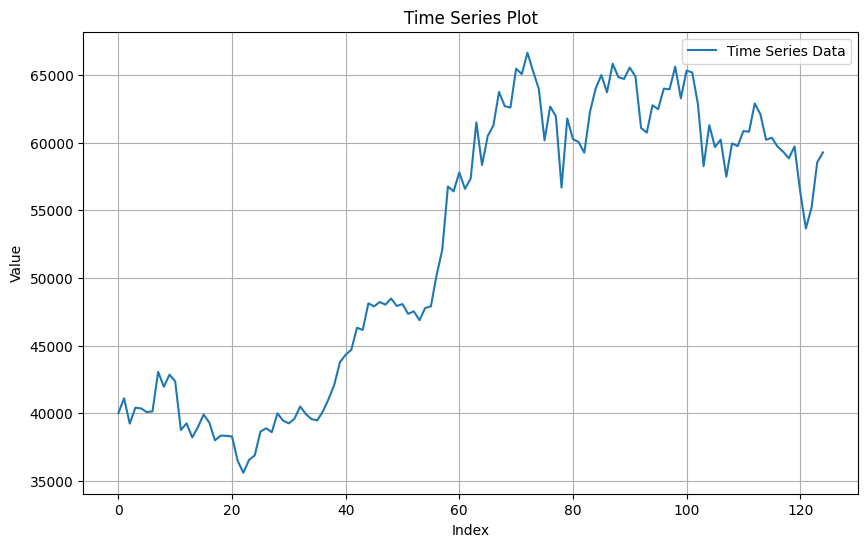

In [9]:
plot_time_series (valid)

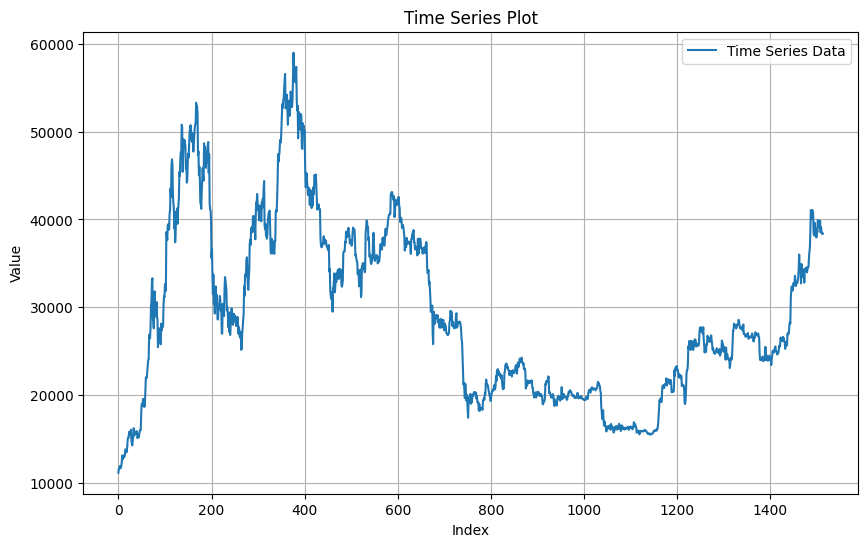

In [10]:
plot_time_series (train)

In [11]:
def normalize_data(train_data, valid_data, lower_percent, upper_percent):
    """
    Normalize training and validation data to a custom range where a certain percentage is mapped to values less than zero.
    
    Parameters:
    train_data (array-like): The training data to be normalized.
    valid_data (array-like): The validation data to be normalized.
    lower_percent (float): The percentage of the range to map to values less than zero.
    upper_percent (float): The percentage of the range to map to values greater than zero.
    
    Returns:
    tuple: A tuple containing the normalized training and validation data.
    """
    min_val = min(train_data)
    max_val = max(train_data)
    range_of_values = np.ptp(train_data) 
    min_val = min_val - range_of_values*5
    max_val = max_val + range_of_values*5
    normalized_train_data = [(x - min_val) / (max_val - min_val) for x in train_data]
    normalized_valid_data = [(x - min_val) / (max_val - min_val) for x in valid_data]
    return normalized_train_data, normalized_valid_data

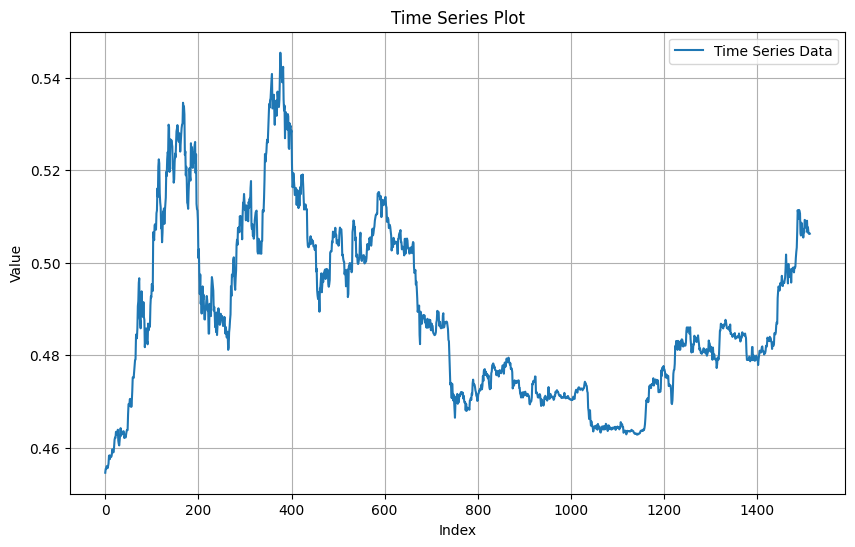

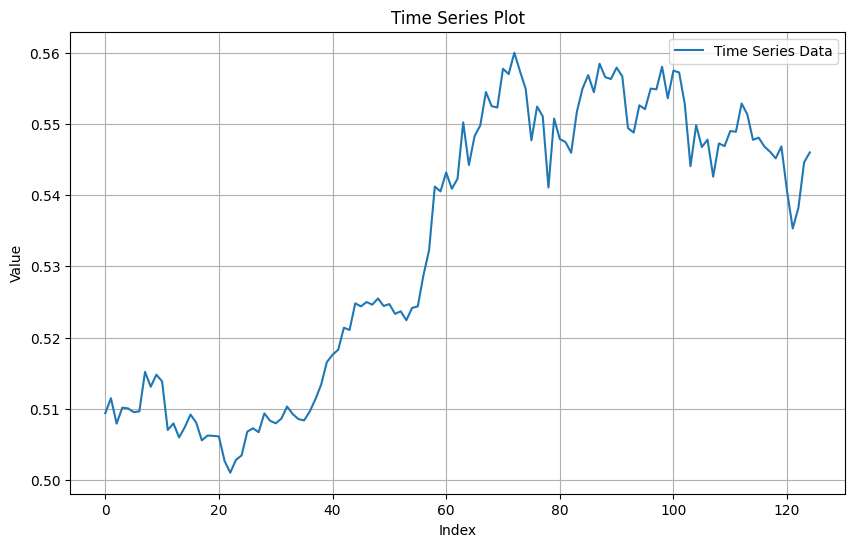

In [12]:
lower_percent = 5
upper_percent = 5

x_train_reshaped = train.reshape(-1, 1)
x_valid_reshaped = valid.reshape(-1, 1)

x_train_reshaped, x_valid_reshaped = normalize_data(x_train_reshaped, x_valid_reshaped, lower_percent , upper_percent)

plot_time_series(x_train_reshaped)
plot_time_series(x_valid_reshaped)

In [13]:
window_size = 30

x_train_window =[]
y_train_window =[]
x_valid_window =[]
y_valid_window =[]

x_train_reshaped = np.array(x_train_reshaped)
x_valid_reshaped = np.array(x_valid_reshaped)

for i in range (window_size, x_train_reshaped.shape[0]):
    x_train_window.append(x_train_reshaped[i-window_size:i, 0])
    y_train_window.append(x_train_reshaped[i, 0])



for i in range (window_size,x_valid_reshaped.shape[0] ):
  x_valid_window.append(x_valid_reshaped[i-window_size:i,0])
  y_valid_window.append(x_valid_reshaped[i,0])

X_train, y_train, X_valid, y_valid = np.array(x_train_window), np.array(y_train_window), np.array(x_valid_window), np.array(y_valid_window)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint
import itertools
import os
import pandas as pd
from tqdm import tqdm

# Define the hyperparameters you want to iterate over
activations = ['relu', 'tanh']
num_of_layers = [0, 1, 2, 3]
units = 50
dropout_rate = 0.2
epochs = 1000

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    history_file_path = f'training_history_{num_layers}_{units}_{activation}.csv'
    if os.path.exists(history_file_path):
        print(f"Training history already exists for Activation={activation}, Num Layers={num_layers}. Skipping...")
        continue

    print(f"Training Neural Network: Activation={activation}, Num Layers={num_layers}")
    # Initialising the ANN model
    regressor = Sequential()

    # Adding input layer
    regressor.add(Dense(units=units, input_dim=X_train.shape[1], activation=activation))

    # Adding hidden layers
    for _ in range(num_layers):
        regressor.add(Dense(units=units, activation=activation))
        regressor.add(Dropout(dropout_rate))

    # Adding output layer
    regressor.add(Dense(units=1))

    # Compile the model with Adam optimizer and specific learning rate
    optimizer = Adam()
    regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanAbsoluteError()])

    # Define a ModelCheckpoint callback to save the best model
    checkpoint = ModelCheckpoint(f'best_model_ANN_{num_layers}_{units}_{activation}.keras', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

    # Fitting the ANN to the Training set with the ModelCheckpoint callback
    progress_bar = tqdm(total=epochs, desc=f"Progress: Activation={activation}, Num Layers={num_layers}", position=0, leave=True)
    for epoch in range(epochs):
        history = regressor.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_valid, y_valid), verbose=0, callbacks=[checkpoint])
        progress_bar.update(1)  # Update the progress bar
        progress_bar.set_postfix(loss=history.history['loss'][0], val_loss=history.history['val_loss'][0])
    progress_bar.close()

    history_df = pd.DataFrame({
        'epoch': range(1, len(history.history['loss']) + 1),
        'loss': history.history['loss'],
        'val_loss': history.history['val_loss'],
        'mean_absolute_error': history.history['mean_absolute_error'],
        'val_mean_absolute_error': history.history['val_mean_absolute_error']
    })
    history_df.to_csv(f'training_history_{num_layers}_{units}_{activation}.csv', index=False)


2024-05-05 13:26:09.877207: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 13:26:09.882949: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 13:26:09.948968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 13:26:13.230073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Training history already exists for Activation=relu, Num Layers=0. Skipping...
Training history already exists for Activation=relu, Num Layers=1. Skipping...
Training history already exists for Activation=relu, Num Layers=2. Skipping...
Training history already exists for Activation=relu, Num Layers=3. Skipping...
Training history already exists for Activation=tanh, Num Layers=0. Skipping...
Training history already exists for Activation=tanh, Num Layers=1. Skipping...
Training history already exists for Activation=tanh, Num Layers=2. Skipping...
Training history already exists for Activation=tanh, Num Layers=3. Skipping...


2024-05-05 13:26:16.944434: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-05 13:26:16.945683: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4418e-05 - mean_absolute_error: 0.0029  
Model Number of Layers: 0, activation : relu
Validation Loss: 1.5782419723109342e-05
Validation Mean Absolute Error: 0.003024036530405283
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


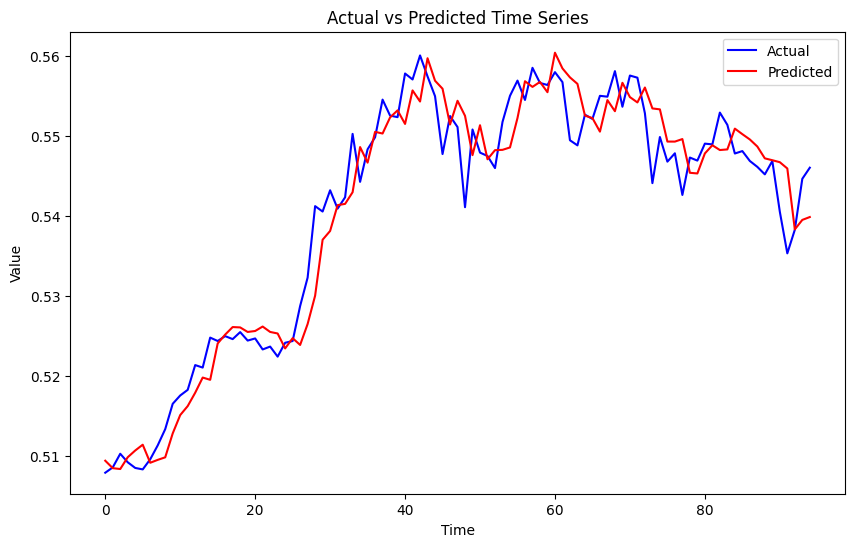

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5563e-05 - mean_absolute_error: 0.0029  
Model Number of Layers: 1, activation : relu
Validation Loss: 1.6159228835022077e-05
Validation Mean Absolute Error: 0.0029040235094726086
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


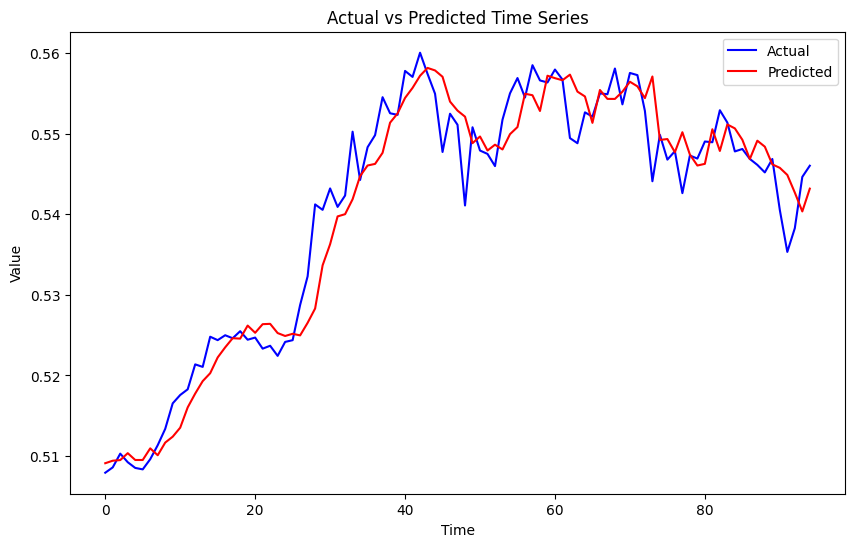

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0242e-05 - mean_absolute_error: 0.0033  
Model Number of Layers: 2, activation : relu
Validation Loss: 2.124231650668662e-05
Validation Mean Absolute Error: 0.0034782697912305593
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fdccc105750> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━

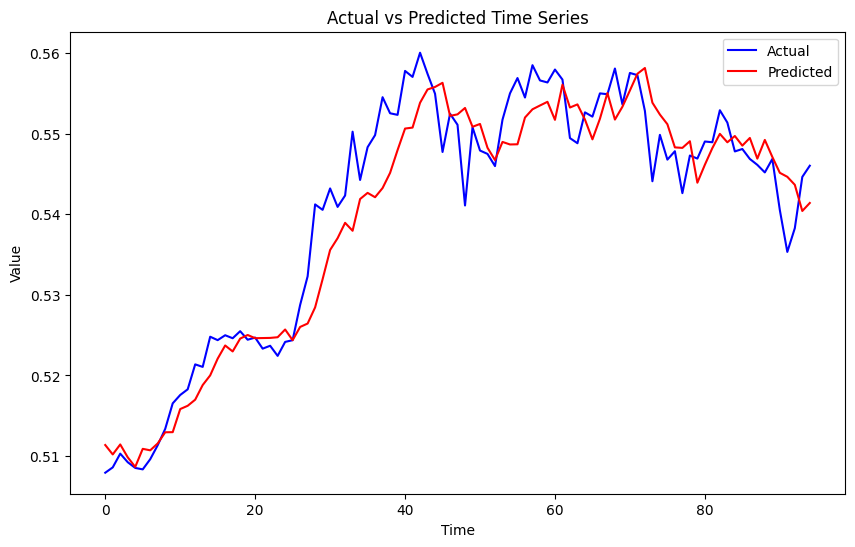

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0367 
Model Number of Layers: 3, activation : relu
Validation Loss: 0.001435793237760663
Validation Mean Absolute Error: 0.037438396364450455
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


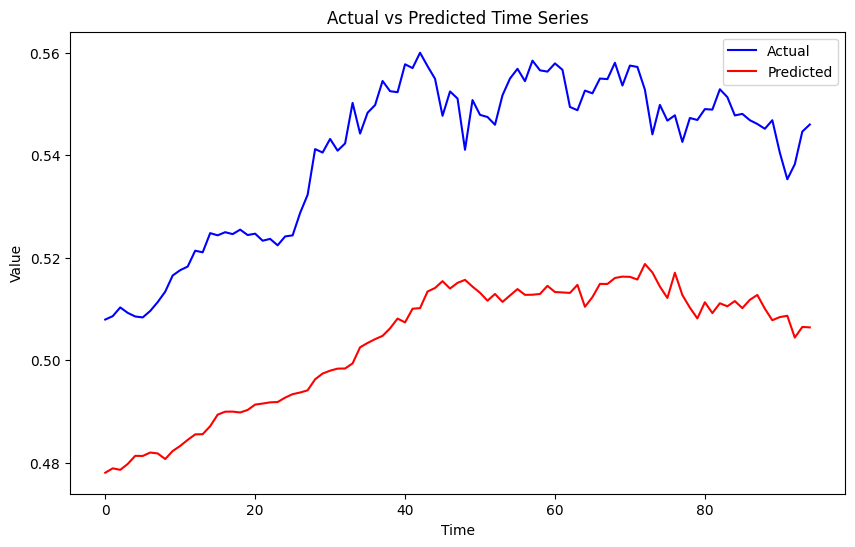

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3085e-05 - mean_absolute_error: 0.0027  
Model Number of Layers: 0, activation : tanh
Validation Loss: 1.3910490451962687e-05
Validation Mean Absolute Error: 0.0028168722055852413
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


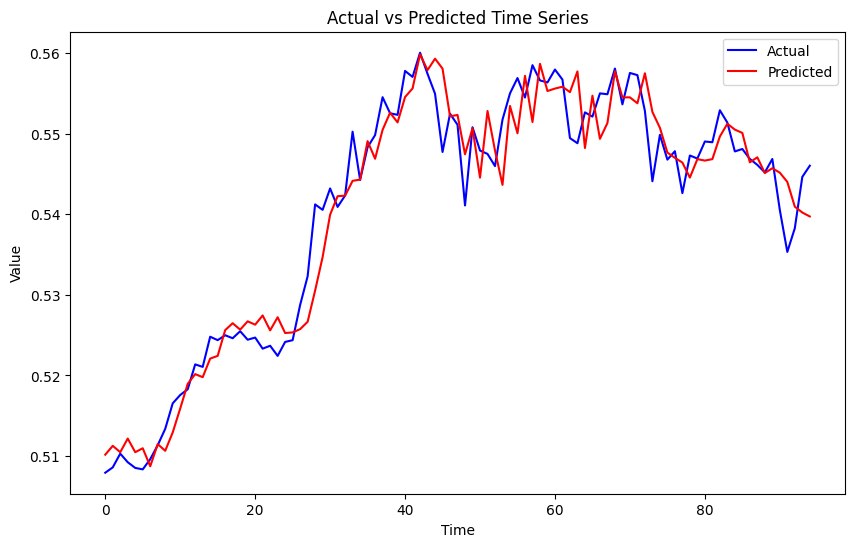

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2859e-05 - mean_absolute_error: 0.0027  
Model Number of Layers: 1, activation : tanh
Validation Loss: 1.3685216799785849e-05
Validation Mean Absolute Error: 0.0028152165468782187
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


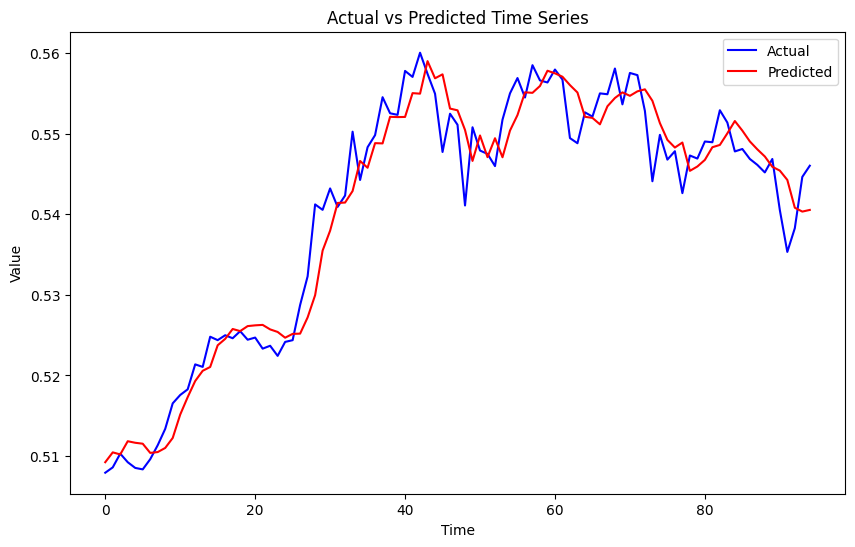

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2998e-05 - mean_absolute_error: 0.0026  
Model Number of Layers: 2, activation : tanh
Validation Loss: 1.4158176782075316e-05
Validation Mean Absolute Error: 0.0027901881840080023
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


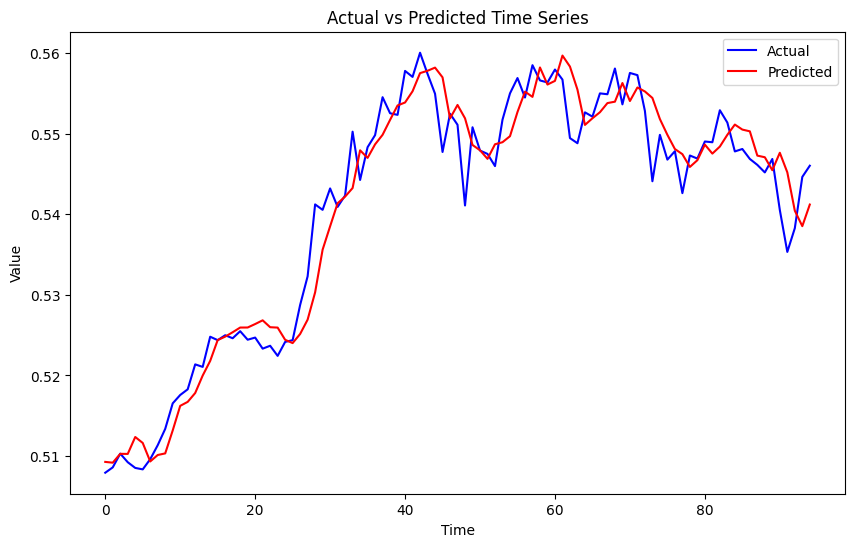

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3847e-05 - mean_absolute_error: 0.0028  
Model Number of Layers: 3, activation : tanh
Validation Loss: 1.406187038810458e-05
Validation Mean Absolute Error: 0.002848234958946705
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


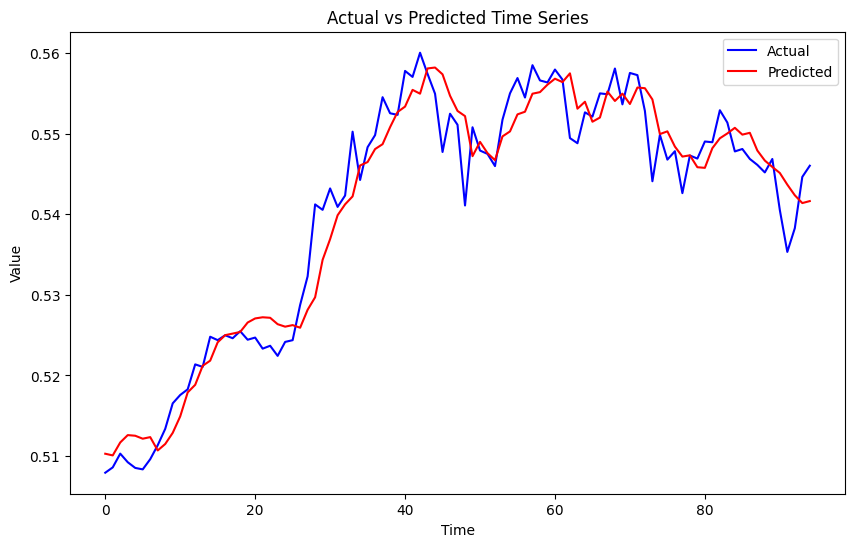

Best model found:
Number of Layers: 1
Units: 50
Activation: tanh
Validation Loss: 1.3685216799785849e-05


In [15]:
from keras.models import load_model

import itertools

activations = ['relu', 'tanh']
num_of_layers = [0, 1, 2, 3]
units = 50

smallest_error = float('inf')  # Initialize smallest error to positive infinity
best_model_info = None

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    model_name = f'best_model_ANN_{num_layers}_{units}_{activation}.keras'
    loaded_model = load_model(model_name) 
    loss, mae = loaded_model.evaluate(X_valid, y_valid)
    print(f"Model Number of Layers: {num_layers}, activation : {activation}")
    print("Validation Loss:", loss)
    print("Validation Mean Absolute Error:", mae)
    
    # Check if current model has smallest error
    if loss < smallest_error:
        smallest_error = loss
        best_model_info = (num_layers, units, activation)
    
    y_pred = loaded_model.predict(X_valid)
    # Assuming timestamps are available for both y_pred and y_valid
    timestamps = range(len(y_valid))
    # Plot y_pred vs y_valid
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, y_valid, label='Actual', color='blue')
    plt.plot(timestamps, y_pred, label='Predicted', color='red')
    plt.title('Actual vs Predicted Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

print("Best model found:")
print("Number of Layers:", best_model_info[0])
print("Units:", best_model_info[1])
print("Activation:", best_model_info[2])
print("Validation Loss:", smallest_error)

In [16]:
activations =[best_model_info[2]]
num_of_layers = [best_model_info[0]]
units = [25, 50, 100, 150]
dropout_rate = 0.2
epochs = 1000

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    for unit in units:
        print(f"Training Neural Network: Activation={activation}, Num Layers={num_layers}, Units={unit}")
        history_file_path = f'training_history_{num_layers}_{unit}_{activation}.csv'
        if os.path.exists(history_file_path):
            print(f"Training history already exists for Activation={activation}, Num Layers={num_layers}, Units={unit}. Skipping...")
            continue

        # Initialising the ANN model
        regressor = Sequential()

        # Adding input layer
        regressor.add(Dense(units=unit, input_dim=X_train.shape[1], activation=activation))

        # Adding hidden layers
        for _ in range(num_layers):
            regressor.add(Dense(units=unit, activation=activation))
            regressor.add(Dropout(dropout_rate))

        # Adding output layer
        regressor.add(Dense(units=1))

        # Compile the model with Adam optimizer and specific learning rate
        optimizer = Adam()
        regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[MeanAbsoluteError()])

        # Define a ModelCheckpoint callback to save the best model
        checkpoint = ModelCheckpoint(f'best_model_ANN_{num_layers}_{unit}_{activation}.keras', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

        # Fitting the ANN to the Training set with the ModelCheckpoint callback
        progress_bar = tqdm(total=epochs, desc=f"Progress: Activation={activation}, Num Layers={num_layers}, Units={unit}", position=0, leave=True)
        for epoch in range(epochs):
            history = regressor.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_valid, y_valid), verbose=0, callbacks=[checkpoint])
            progress_bar.update(1)  # Update the progress bar
            progress_bar.set_postfix(loss=history.history['loss'][0], val_loss=history.history['val_loss'][0])
        progress_bar.close()

        history_df = pd.DataFrame({
            'epoch': range(1, len(history.history['loss']) + 1),
            'loss': history.history['loss'],
            'val_loss': history.history['val_loss'],
            'mean_absolute_error': history.history['mean_absolute_error'],
            'val_mean_absolute_error': history.history['val_mean_absolute_error']
        })
        history_df.to_csv(f'training_history_{num_layers}_{unit}_{activation}.csv', index=False)

Training Neural Network: Activation=tanh, Num Layers=1, Units=25
Training history already exists for Activation=tanh, Num Layers=1, Units=25. Skipping...
Training Neural Network: Activation=tanh, Num Layers=1, Units=50
Training history already exists for Activation=tanh, Num Layers=1, Units=50. Skipping...
Training Neural Network: Activation=tanh, Num Layers=1, Units=100
Training history already exists for Activation=tanh, Num Layers=1, Units=100. Skipping...
Training Neural Network: Activation=tanh, Num Layers=1, Units=150
Training history already exists for Activation=tanh, Num Layers=1, Units=150. Skipping...


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Model Number of Layers: 1, Units: 25, Activation: tanh
Validation Mean Absolute Error: 0.0027029018
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model Number of Layers: 1, Units: 50, Activation: tanh
Validation Mean Absolute Error: 0.0028152165
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model Number of Layers: 1, Units: 100, Activation: tanh
Validation Mean Absolute Error: 0.002668333
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model Number of Layers: 1, Units: 150, Activation: tanh
Validation Mean Absolute Error: 0.0028536168
Best model found:
Number of Layers: 1
Units: 100
Activation: tanh
Smallest Validation Mean Absolute Error: 0.002668333


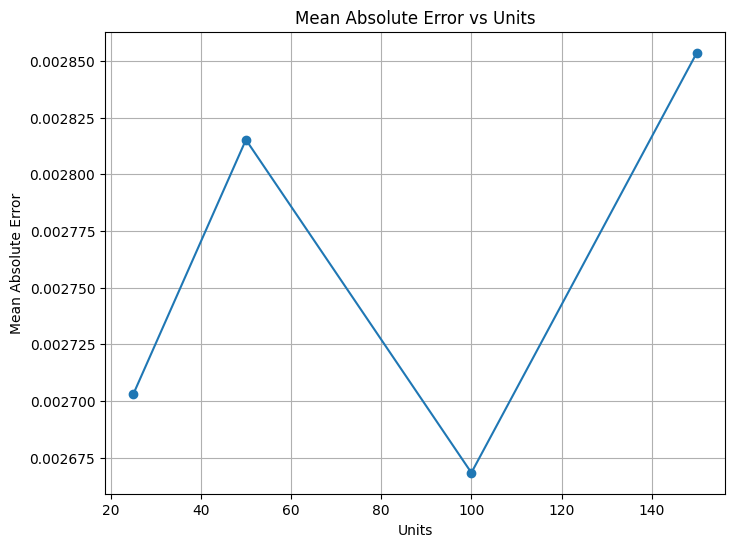

In [17]:
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import MeanAbsoluteError


num_of_layers = [best_model_info[0]]
units = [25, 50, 100, 150]

smallest_error = float('inf')  # Initialize smallest error to positive infinity
best_model_info = None
mae_values = []  # Store MAE values for plotting
unit_values = []  # Store unit values for plotting

# Loop over the combinations
for activation, num_layers in itertools.product(activations, num_of_layers):
    for unit in units:
        model_name = f'best_model_ANN_{num_layers}_{unit}_{activation}.keras'
        loaded_model = load_model(model_name) 
        y_pred = loaded_model.predict(X_valid)
        mae_metric = MeanAbsoluteError()
        mae_metric.update_state(y_valid, y_pred)
        mae = mae_metric.result().numpy()  # Extract MAE value
        mae_values.append(mae)
        unit_values.append(unit)
        print(f"Model Number of Layers: {num_layers}, Units: {unit}, Activation: {activation}")
        print("Validation Mean Absolute Error:", mae)
        if mae < smallest_error:
            smallest_error = mae
            best_model_info = (num_layers, unit, activation)

print("Best model found:")
print("Number of Layers:", best_model_info[0])
print("Units:", best_model_info[1])
print("Activation:", best_model_info[2])
print("Smallest Validation Mean Absolute Error:", smallest_error) 

# Plot MAE vs Units
plt.figure(figsize=(8, 6))
plt.plot(unit_values, mae_values, marker='o', linestyle='-')
plt.title('Mean Absolute Error vs Units')
plt.xlabel('Units')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()

In [18]:
with open('model_info.txt', 'w') as f:
    # Write the information to the file
    f.write("Best model found ANN:\n")
    f.write("Number of Layers: {}\n".format(best_model_info[0]))
    f.write("Units: {}\n".format(best_model_info[1]))
    f.write("Activation: {}\n".format(best_model_info[2]))
    f.write("Smallest Validation Mean Absolute Error: {}\n".format(smallest_error))

# Print confirmation message
print("Model information saved to model_info.txt")

Model information saved to model_info.txt
